In [1]:
from FDFD.Fdfd import Fdfd

import matplotlib.pylab as plt
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
omega = 5e14                # angular frequency (2pi)
dl = 1e-7                   # grid size (m)
eps_r = np.ones((100,100))  # relative permittivity
eps_r[40:60, 40:60] = 5     # define box
NPML = [10, 10]             # number of pml grid points on x and y borders
pol = 'Hz'                  # polarization (either 'Hz' or 'Ez')

In [3]:
# sets simulation variables, constructs system matrix 'A', stored in 'simulation' object
simulation = Fdfd(omega,eps_r,dl,NPML,pol)

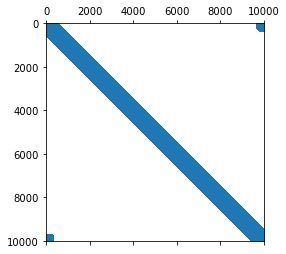

In [4]:
# look at sparsity pattern of A
plt.spy(simulation.A)
plt.show()

In [5]:
# set source and solve for electromagnetic fields
b = np.zeros((simulation.Nx,simulation.Ny))
b[40:60,30] = 1
(Hx,Hy,Ez) = simulation.solve_fields(b)

SystemError: <built-in method nonzero of numpy.ndarray object at 0x7f2d23a582b0> returned a result with an error set

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


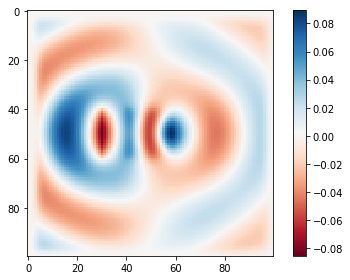

In [7]:
# plot
plt.imshow(np.real(Ez), cmap='RdBu')
plt.colorbar()

In [ ]:
simulation

In [6]:
B = sp.spdiags(np.random.rand(3), 0, 3, 3)

In [7]:
print(np.real(B))

  (0, 0)	0.779070517594
  (1, 1)	0.0449367346442
  (2, 2)	0.117946943419


In [8]:
print(np.imag(B))

0


In [10]:
B1 = sp.hstack([np.real(B), -np.imag(B)])

SystemError: <built-in method nonzero of numpy.ndarray object at 0x7f2d239e05d0> returned a result with an error set